In [2]:
# Visualization
from matplotlib import pyplot as plt
import numpy as np

# Modules for loading dataset
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, random_split

# Custom Modules
from found import found
from models.VGG13 import VGG13
from models.DataLoader import FaceDataset

# Load Dataset for Watermarking

In [3]:
'''
Sets up the dataset to be watermarked
'''

# Instantiate Variable

SEED = 42
ROOT_PATH = "/home/ychien13/my_github/CSE467_Privacy/Image_Poisoning/data/raw/Images"
IN_CHANNELS = 3
OUT_CHANNELS = 3

# Check if nvidia GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224),antialias=True)
])

# Initializing Datasets
dataset = FaceDataset(ROOT_PATH,transform)
generator = torch.Generator().manual_seed(SEED)

train_data,attack_data, test_data = random_split(dataset,[0.7,0.1,0.2], generator=generator)

# Batch 1 because each image need to be handle independently
attack_loader = DataLoader(attack_data, batch_size=1, shuffle=True, generator=generator)
model = VGG13(IN_CHANNELS,OUT_CHANNELS).to(device)

print(f"Attack dataset: {len(attack_loader)}")

Attack dataset: 500


# Testing with One image

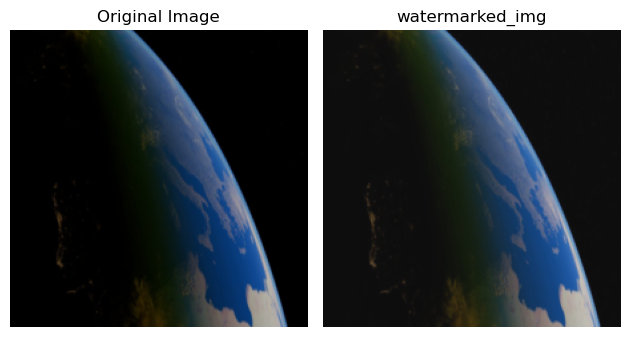

In [8]:
img, lable = next(iter(attack_loader))

fig, axes = plt.subplots(nrows=1,ncols=2)

watermarked_img = found(model,img)

axes[0].imshow(img[0].permute((1,2,0)))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow( np.clip( watermarked_img[0].permute((1,2,0)),a_min=0,a_max=1) )
axes[1].set_title("watermarked_img")
axes[1].axis("off")

plt.tight_layout()
plt.show()